In [1]:
import random
import numpy as np
from scalar_grad import Value
from mlp import Net, neuron, train
import plotly.express as px
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
a = Value(5)
def f(x): return (x+2)**2 + x**3
y = f(a)
y.backward()
print(y.data, a.grad)

174 89


### SGD

Given: data $(x_1, y_1), ..., (x_n, y_n)$
Goal: find hypothesis $h$ which minimizes the empirical loss $L(h) = \frac{1}{n} \sum_{i=1}^n L(h(x_i),y_i)$ where the loss function $L$ maps the label and the ground truth to a real number.

### Linear regression with SGD (Algorithm)

1. Initialize hypothesis $h$ to be a random vector. Set learning rate $\eta$ to be a small number, e.g. $\eta = 0.1$
2. For $t \in 1,...,T$ (where $T$ is the number of epochs)
  3. For $i \in 1,...,n$ (in random data point order)
     4. Let $h \leftarrow h - \eta \nabla_{h} L_i(h)$

### Let's do some examples to see SGD in action

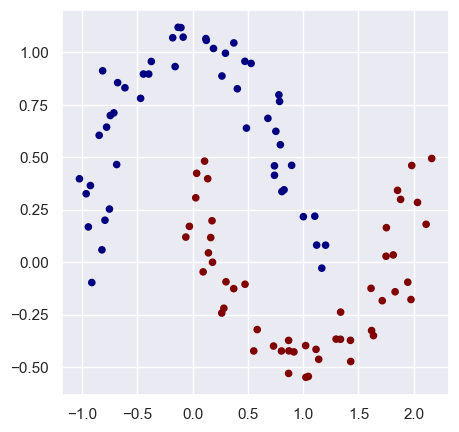

In [3]:
np.random.seed(1337)
random.seed(1337)

from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.1)

y = y*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [ ]:
model = train(X,y)

# You can toggle the learning rate to see the effect on training
# n = 0.001 vs n = 1.0 - 0.9*epoch/100

# Let's additionally try some regularization, change the initialization

Epoch 0 mean loss 2.396688445289767 Accuracy 50%
Epoch 1 mean loss 35.507649397804734 Accuracy 82%
Epoch 2 mean loss 2.342168424964479 Accuracy 87%
Epoch 3 mean loss 1.0715070188093379 Accuracy 67%
Epoch 4 mean loss 2.182498068754901 Accuracy 81%
Epoch 5 mean loss 4.459836075863939 Accuracy 81%
Epoch 6 mean loss 1.9271368930857433 Accuracy 80%
Epoch 7 mean loss 1.132487914818876 Accuracy 80%
Epoch 8 mean loss 0.805015996113497 Accuracy 79%
Epoch 9 mean loss 0.6129180183368965 Accuracy 79%
Epoch 10 mean loss 0.5219853912659573 Accuracy 79%
Epoch 11 mean loss 0.4810927284576749 Accuracy 79%
Epoch 12 mean loss 0.45195788519454744 Accuracy 80%
Epoch 13 mean loss 0.42950135170113146 Accuracy 80%
Epoch 14 mean loss 0.41088133785332104 Accuracy 79%
Epoch 15 mean loss 0.39518177109425096 Accuracy 80%
Epoch 16 mean loss 0.37878691627595956 Accuracy 81%
Epoch 17 mean loss 0.3653722789863149 Accuracy 80%
Epoch 18 mean loss 0.34939472398835075 Accuracy 81%
Epoch 19 mean loss 0.33538252396395585 Ac

In [ ]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())